In [1]:

import numpy as np                
import pandas as pd
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, silhouette_score


In [2]:
dataset=pd.read_csv('Book1.csv')

In [3]:
dataset.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating1,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01,High
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95,High
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88,High
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87,High
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86,High


In [4]:
dataset.shape

(98, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating1       98 non-null     float64
 10  Rating        98 non-null     object 
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ KB


In [6]:
dataset.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating1
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,52.183673,11.851020,69.704082,3.336735,49.995918,80.441837,16.006122,6.646122
std,16.445691,2.149718,15.137316,2.148814,4.890068,4.690172,3.078955,0.132148
min,20.000000,7.100000,40.000000,0.000000,38.500000,66.500000,9.500000,6.410000
25%,40.250000,10.325000,60.000000,2.000000,46.225000,78.025000,14.025000,6.540000
50%,50.000000,11.450000,67.500000,3.000000,49.750000,80.800000,16.100000,6.630000
75%,61.750000,13.350000,80.000000,4.750000,52.850000,83.450000,17.850000,6.730000
max,99.000000,17.100000,117.000000,10.000000,62.400000,89.700000,26.800000,7.010000


In [7]:
 import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

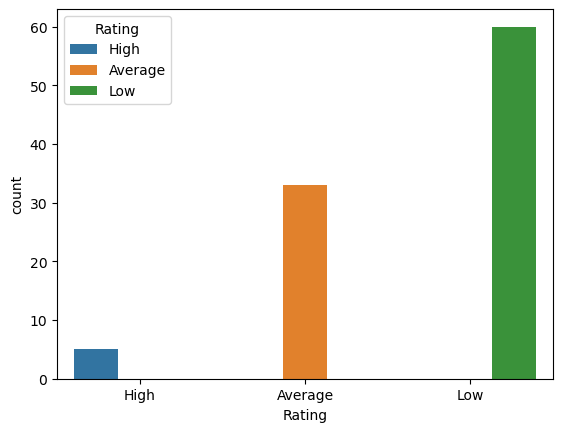

In [8]:
sns.countplot(x="Rating",hue="Rating",data=dataset)

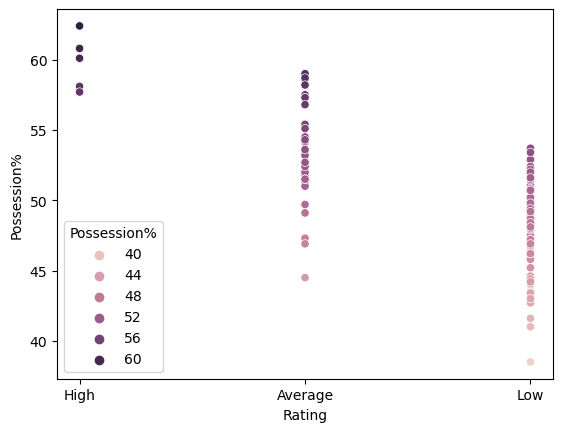

In [9]:
sns.scatterplot(data=dataset,x=dataset["Rating"], y=dataset["Possession%"], hue=dataset["Possession%"])
plt.show()

In [10]:
dataset.corr()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating1
Goals,1.000000,0.829698,-0.189157,-0.001185,0.717834,0.694214,-0.495579,0.852152
Shots pg,0.829698,1.000000,-0.369343,-0.105080,0.759153,0.684035,-0.382147,0.851265
yellow_cards,-0.189157,-0.369343,1.000000,0.368847,-0.164302,-0.184238,0.060116,-0.417049
red_cards,-0.001185,-0.105080,0.368847,1.000000,-0.083360,-0.043761,-0.031791,-0.162358
Possession%,0.717834,0.759153,-0.164302,-0.083360,1.000000,0.851458,-0.543970,0.734978
Pass%,0.694214,0.684035,-0.184238,-0.043761,0.851458,1.000000,-0.764788,0.668573
AerialsWon,-0.495579,-0.382147,0.060116,-0.031791,-0.543970,-0.764788,1.000000,-0.327225
Rating1,0.852152,0.851265,-0.417049,-0.162358,0.734978,0.668573,-0.327225,1.000000


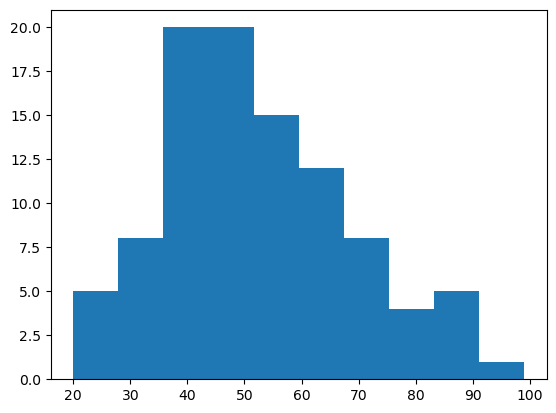

In [11]:
plt.hist(dataset['Goals'], bins=10)

plt.show()

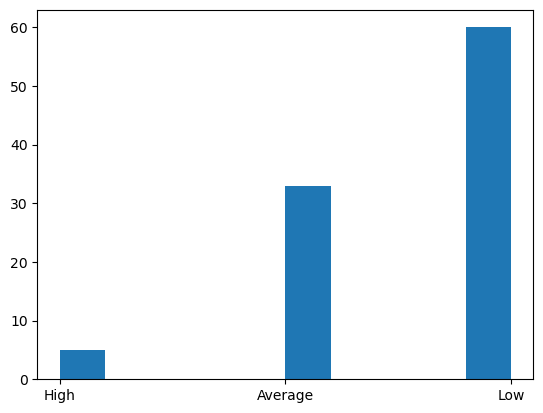

In [12]:
plt.hist(dataset['Rating'], bins=10)

plt.show()

In [13]:
dataset['Tournament'].unique()

array(['Premier League', 'Bundesliga', 'Ligue 1', 'LaLiga', 'Serie A'],
      dtype=object)

<AxesSubplot:xlabel='Tournament', ylabel='count'>

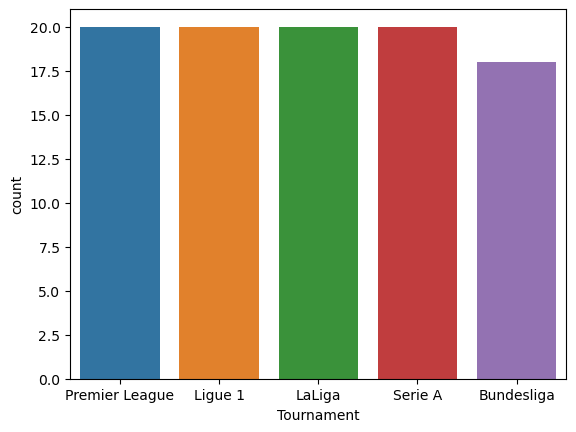

In [14]:
sns.countplot(x = 'Tournament', data=dataset, order = dataset['Tournament'].value_counts().index)

In [15]:
from sklearn import preprocessing
labelEncoder=preprocessing.LabelEncoder()
dataset['Tournament']=labelEncoder.fit_transform(dataset['Tournament'])

In [16]:
dataset

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating1,Rating
0,Manchester City,3,83,15.8,46,2,60.8,89.4,12.8,7.01,High
1,Bayern Munich,0,99,17.1,44,3,58.1,85.5,12.9,6.95,High
2,Paris Saint-Germain,2,86,15.0,73,7,60.1,89.5,9.5,6.88,High
3,Barcelona,1,85,15.3,68,2,62.4,89.7,10.6,6.87,High
4,Real Madrid,1,67,14.4,57,2,57.7,87.7,11.8,6.86,High
...,...,...,...,...,...,...,...,...,...,...,...
93,Sheffield United,3,20,8.5,73,3,43.0,76.9,19.1,6.46,Low
94,Crotone,4,45,9.5,85,4,47.2,80.4,12.7,6.43,Low
95,Benevento,4,40,11.0,90,5,44.2,77.7,13.4,6.43,Low
96,Dijon,2,25,9.2,75,5,46.9,80.0,14.3,6.42,Low


In [17]:
dataset=dataset.drop(["Team","yellow_cards","red_cards","AerialsWon","Rating1"],axis=1)

In [18]:
dataset.isnull().sum()

Tournament     0
Goals          0
Shots pg       0
Possession%    0
Pass%          0
Rating         0
dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

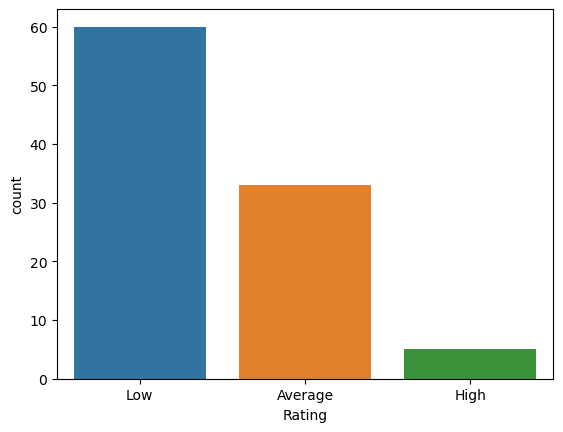

In [19]:
sns.countplot(x = 'Rating', data=dataset, order = dataset['Rating'].value_counts().index)

In [20]:
dataset.groupby('Rating').size()

Rating
Average    33
High        5
Low        60
dtype: int64

In [21]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
ds_low = dataset[(dataset['Rating']=="Low")] #low assigned to a variable
ds_average = dataset[(dataset['Rating']=="Average")] #
ds_high = dataset[(dataset['Rating']=="High")]
# upsample minority class
ds_average_upsampled = resample(ds_average,
                                 replace=True,    # sample with replacement
                                 n_samples= 60, # to match majority class
                                 random_state=42)  # reproducible results
                                  #average upsampled and assigned to another variable
                                  #ds avrage is upsampled, data is duplicated and sampled upto 1017(high) with a random state,
ds_high_upsampled = resample(ds_high,
                                 replace=True,    # sample with replacement
                                 n_samples= 60, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
dataset = pd.concat([ds_average_upsampled,ds_high_upsampled, ds_low]) # average and low upsampled, high no need to, and concatinated to another data set

In [22]:
dataset.groupby('Rating').size()

Rating
Average    60
High       60
Low        60
dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

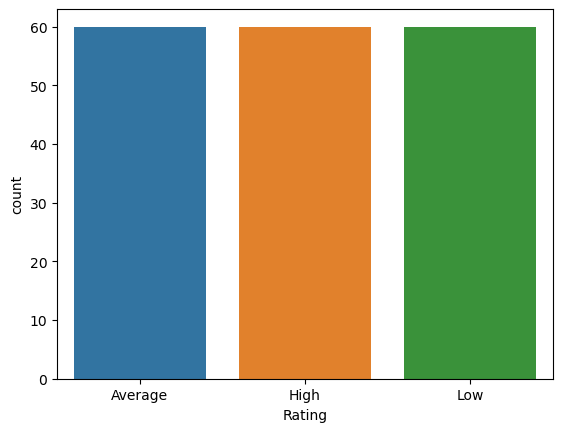

In [23]:
sns.countplot(x = 'Rating', data=dataset, order = dataset['Rating'].value_counts().index)

In [24]:
dataset['Rating'].unique()

array(['Average', 'High', 'Low'], dtype=object)

In [25]:
cat = {"Low":1,'Average':2,'High':3}
dataset['Rating'] = dataset['Rating'].map(cat)

In [26]:
dataset

,Tournament,Goals,Shots pg,Possession%,Pass%,Rating
33,0,56,13.4,51.5,81.1,2
19,4,89,14.5,52.0,87.0,2
12,3,68,16.0,59.0,85.7,2
25,0,53,13.0,57.3,84.4,2
23,3,62,12.3,44.5,77.8,2
...,...,...,...,...,...,...
93,3,20,8.5,43.0,76.9,1
94,4,45,9.5,47.2,80.4,1
95,4,40,11.0,44.2,77.7,1
96,2,25,9.2,46.9,80.0,1


<AxesSubplot:xlabel='Rating', ylabel='count'>

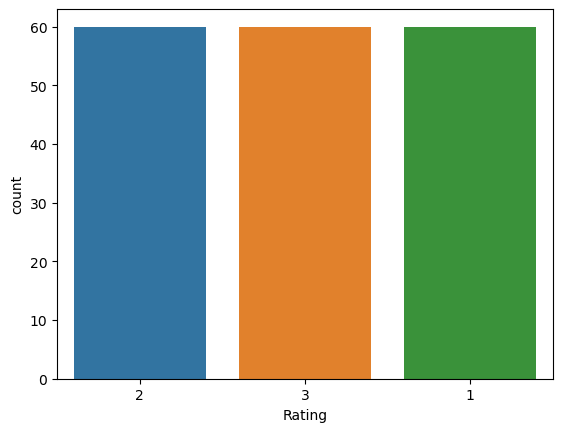

In [27]:
sns.countplot(x = 'Rating', data=dataset, order = dataset['Rating'].value_counts().index)

In [28]:
x=dataset.iloc[:,:-1].values #index 1 to end as features (Pclass to Embarked)
y=dataset.iloc[:,-1].values #0th as expected result (Survived or not)

In [29]:
x

array([[ 0. , 56. , 13.4, 51.5, 81.1],
       [ 4. , 89. , 14.5, 52. , 87. ],
       [ 3. , 68. , 16. , 59. , 85.7],
       [ 0. , 53. , 13. , 57.3, 84.4],
       [ 3. , 62. , 12.3, 44.5, 77.8],
       [ 2. , 76. , 12.8, 54.2, 82.7],
       [ 3. , 68. , 11.7, 51.3, 81.8],
       [ 3. , 68. , 11.7, 51.3, 81.8],
       [ 4. , 68. , 14.3, 51.5, 84.5],
       [ 4. , 68. , 14.3, 51.5, 84.5],
       [ 3. , 55. , 13.7, 49.1, 78.6],
       [ 0. , 69. , 13.2, 52.4, 79.6],
       [ 4. , 77. , 15.7, 55.4, 88.3],
       [ 4. , 68. , 14.3, 51.5, 84.5],
       [ 3. , 36. , 12.2, 49.7, 83.2],
       [ 4. , 77. , 15.7, 55.4, 88.3],
       [ 0. , 53. , 13. , 57.3, 84.4],
       [ 1. , 60. , 10.7, 54.3, 84.4],
       [ 4. , 86. , 17. , 54.1, 87. ],
       [ 0. , 69. , 13.2, 52.4, 79.6],
       [ 1. , 53. , 12.1, 58.7, 86.2],
       [ 3. , 55. , 12.1, 52.7, 85. ],
       [ 2. , 52. , 13.5, 56.8, 85.6],
       [ 2. , 81. , 16.1, 53.6, 84.7],
       [ 4. , 89. , 14.5, 52. , 87. ],
       [ 3. , 55. , 13.7,

In [30]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [32]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (126, 5)
y_train:  (126,)
x_test:  (54, 5)
y_test:  (54,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(max_iter = 600) #loading the algorith
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_lr)*100)

Accuracy :  90.74074074074075


C:\Users\faris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
#Desicion tree classifier

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_dt)*100)

Accuracy :  88.88888888888889


In [58]:
#neive bayes 

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)

y_pred_nb = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_nb)*100)

Accuracy :  94.44444444444444


In [59]:
#support vector machine

from sklearn.svm import SVC
model_svc = SVC(gamma='auto')
model_svc.fit(x_train,y_train)
y_pred_svc = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_svc)*100)

Accuracy :  94.44444444444444


In [60]:
Xnew = [[3,20,8.5,43.0,76.9]]

ynew = model_lr.predict(Xnew)

print(ynew)

[1]
